<a href="https://colab.research.google.com/github/ddarshana04/Geospatial-Deep-Learning-for-Estimating-Socioeconomic-Well-being-in-Developing-Regions/blob/main/Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/all-models-h5/VGG_model_augment_finetune.h5
/kaggle/input/all-models-h5/CNN_model_augment.h5
/kaggle/input/all-models-h5/CNN_Lesnet_model.h5
/kaggle/input/all-models-h5/VGG_model_augment.h5
/kaggle/input/all-models-h5/VGG_model.h5
/kaggle/input/all-models-h5/Inception_model_augemnt_finetune_200.h5
/kaggle/input/all-models-h5/ResNet_model_augment_finetune.h5
/kaggle/input/poverty-prediction-models/VGG_model.h5
/kaggle/input/poverty-prediction-models/CNN_model_augemnt.h5
/kaggle/input/poverty-prediction-models/CNN_model.h5
/kaggle/input/vgg16-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/inception-weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5
/kaggle/input/google-image-cnn/google_image_cnn-20240218T065323Z-001/google_image_cnn/class_1/25080_9502.jpg
/kaggle/input/google-image-cnn/google_image_cnn-20240218T065323Z-001/google_image_cnn/class_1/25211

In [ ]:
# Code to read csv file into Colaboratory:
import os
import os.path
import numpy as np
import time
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import PIL.Image
import glob
import shutil
import pickle

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Suppress TensorFlow info and warning messages
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'  # Allow TensorFlow to allocate GPU memory as needed

import tensorflow as tf

# Your code continues here


2024-04-04 17:08:30.005535: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 17:08:30.005699: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 17:08:30.174391: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
import tensorflow as tf


In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*cuDNN.*")
warnings.filterwarnings("ignore", message=".*cuFFT.*")
warnings.filterwarnings("ignore", message=".*cuBLAS.*")


In [ ]:
## tf/keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
#from keras.constraints import maxnorm
from keras import optimizers
import keras.backend as K
from keras.callbacks import EarlyStopping
#from keras.wrappers.scikit_learn import KerasRegressor
from keras.applications.vgg16 import VGG16

In [ ]:
from keras.models import Sequential, Model
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from keras.layers import Dense, Dropout, BatchNormalization, Conv2D, AveragePooling2D, Activation, Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
from multiprocessing import Pool

In [ ]:
print('TensorFlow version')
print(tf.__version__)
%matplotlib inline
np.random.seed(42)

TensorFlow version
2.15.0


In [ ]:
path_1t = '/kaggle/input/google-image-cnn/google_image_cnn-20240218T065323Z-001/google_image_cnn/train/class_1/'
path_2t = '/kaggle/input/google-image-cnn/google_image_cnn-20240218T065323Z-001/google_image_cnn/train/class_2/'
path_3t = '/kaggle/input/google-image-cnn/google_image_cnn-20240218T065323Z-001/google_image_cnn/train/class_3/'
path_1s = '/kaggle/input/google-image-cnn/google_image_cnn-20240218T065323Z-001/google_image_cnn/test/class_1/'
path_2s = '/kaggle/input/google-image-cnn/google_image_cnn-20240218T065323Z-001/google_image_cnn/test/class_2/'
path_3s = '/kaggle/input/google-image-cnn/google_image_cnn-20240218T065323Z-001/google_image_cnn/test/class_3/'

In [ ]:
# Train set
path_train = []  # The path for all training examples
label_train = []  # The label for all training examples

class_1_files = os.listdir(path_1t)
label_train += [[1, 0, 0]] * len(class_1_files)
path_train += [os.path.join(path_1t, i) for i in class_1_files]

class_2_files = os.listdir(path_2t)
label_train += [[0, 1, 0]] * len(class_2_files)
path_train += [os.path.join(path_2t, i) for i in class_2_files]

class_3_files = os.listdir(path_3t)
label_train += [[0, 0, 1]] * len(class_3_files)
path_train += [os.path.join(path_3t, i) for i in class_3_files]

In [ ]:
# test set
path_test = []
label_test = []

class_1_files = os.listdir(path_1s)
label_test += [[1, 0, 0]] * len(class_1_files)
path_test += [os.path.join(path_1s , i) for i in class_1_files]  # Use str() or / operator to concatenate

class_2_files = os.listdir(path_2s)
label_test += [[0, 1, 0]] * len(class_2_files)
path_test += [os.path.join(path_2s , i) for i in class_2_files]

class_3_files = os.listdir(path_3s)
label_test += [[0, 0, 1]] * len(class_3_files)
path_test += [os.path.join(path_3s , i) for i in class_3_files]


In [ ]:
# Print the lengths of the path_train and path_test lists
print('Number of images in train directory:', len(path_train))
print('Number of images in test directory:', len(path_test))

Number of images in train directory: 565
Number of images in test directory: 143


In [ ]:
#IMG_DIM = (400, 400) # image size
IMG_DIM = (256,256) # reduce image size

t1=time.time()
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in path_train]
train_imgs = np.array(train_imgs)
train_labels = np.array(label_train)#

test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in path_test]
test_imgs = np.array(test_imgs)
test_labels = np.array(label_test)#
t2=time.time()

print(t2-t1)
print('Train dataset shape:', train_imgs.shape)
print('Test dataset shape:', test_imgs.shape)

6.84332537651062
Train dataset shape: (565, 256, 256, 3)
Test dataset shape: (143, 256, 256, 3)


In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
test_imgs_scaled  = test_imgs.astype('float32')
train_imgs_scaled /= 255  # scale image pixel to 255
test_imgs_scaled /= 255 # scale image pixel to 255

low nightlight intensity
[1 0 0]
(256, 256, 3)


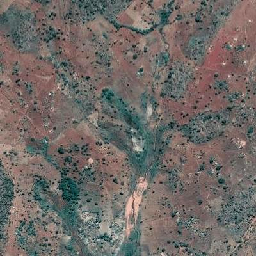

In [ ]:
print('low nightlight intensity')
print(train_labels[30])
print(train_imgs[30].shape)
array_to_img(train_imgs[30])

low nightlight intensity
[1 0 0]
(256, 256, 3)


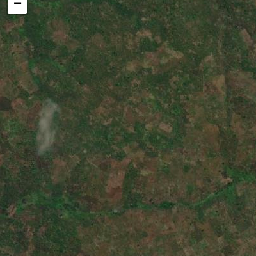

In [ ]:
print('low nightlight intensity')
print(train_labels[50])
print(train_imgs[50].shape)
array_to_img(train_imgs[50])

low nightlight intensity
[1 0 0]
(256, 256, 3)


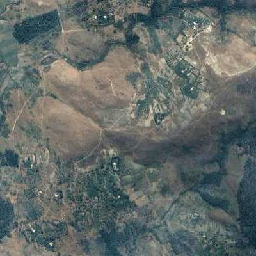

In [ ]:
print('low nightlight intensity')
print(train_labels[120])
print(train_imgs[120].shape)
array_to_img(train_imgs[120])

medium nightlight intensity
[0 1 0]
(256, 256, 3)


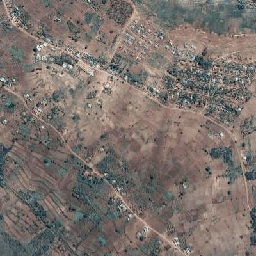

In [ ]:
print('medium nightlight intensity')
print(train_labels[360])
print(train_imgs[360].shape)
array_to_img(train_imgs[360])

medium nightlight intensity
[0 1 0]
(256, 256, 3)


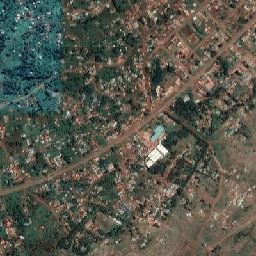

In [ ]:
print('medium nightlight intensity')
print(train_labels[260])
print(train_imgs[260].shape)
array_to_img(train_imgs[260])

medium nightlight intensity
[0 1 0]
(256, 256, 3)


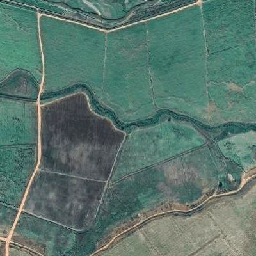

In [ ]:
print('medium nightlight intensity')
print(train_labels[290])
print(train_imgs[290].shape)
array_to_img(train_imgs[290])

high nightlight intensity
[0 0 1]
(256, 256, 3)


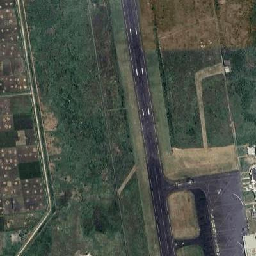

In [ ]:
print('high nightlight intensity')
print(train_labels[-20])
print(train_imgs[-20].shape)
array_to_img(train_imgs[-20])

high nightlight intensity
[0 0 1]
(256, 256, 3)


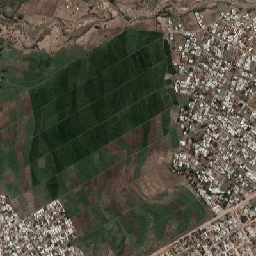

In [ ]:
print('high nightlight intensity')
print(train_labels[-75])
print(train_imgs[-75].shape)
array_to_img(train_imgs[-75])

high nightlight intensity
[0 0 1]
(256, 256, 3)


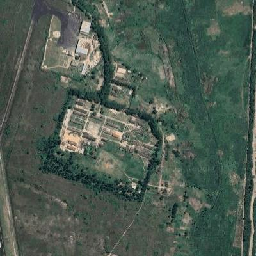

In [ ]:
print('high nightlight intensity')
print(train_labels[-110])
print(train_imgs[-110].shape)
array_to_img(train_imgs[-110])

*> **MODELS*****

**1. CNN MODEL (SIMILAR TO LENET - 5)**

In [ ]:
batch_size = 30
epochs = 150
input_shape = (256,256, 3)
np.random.seed(42)

In [ ]:
# simple CNN models (LeNet-5)
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()
# first layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',
                 input_shape=input_shape))

# 2nd layer, with pooling and dropout
model.add(Conv2D(64, kernel_size=(3, 3),kernel_regularizer = 'l2', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())
# dense hidden layer, with dropout
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))

# output layer
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),#'adam',
              metrics=['accuracy'])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 252, 252, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1016064)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │   130,056,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,076,099 (496.20 MB)

 Trainable params: 130,076,099 (496.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_model = model
# Train the model
history = cnn_model.fit(x=train_imgs_scaled, y=train_labels,
                        validation_data=(test_imgs_scaled, test_labels),
                        batch_size=batch_size,
                        epochs=epochs,
                        verbose=1)

In [ ]:
def plot_performance(history):
    '''
    metrics plot for model performance
    '''
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.rcParams.update({'font.size': 14})  # Reduce font size

    epoch_list = list(range(len(history.history['accuracy'])))  # Update epoch_list

    # Scale accuracy (optional)
    scaled_accuracy = np.array(history.history['accuracy']) * 0.9

    # Plot every other epoch for accuracy
    ax1.plot(epoch_list[::2], scaled_accuracy[::2], label='Train', linewidth=2)
    ax1.plot(epoch_list[::2], history.history['val_accuracy'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to 150
    ax1.set_xticks(np.arange(0, len(epoch_list) + 1, 10))

    # Set x-axis labels from 0 to 150
    ax1.set_xticklabels(np.arange(0, len(epoch_list) + 1, 10), rotation=45, ha='right', fontsize=10)  # Increase rotation angle

    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    l1 = ax1.legend(loc="best")
    ax1.grid(False)  # Add grid lines

    # Plot every other epoch for loss
    ax2.plot(epoch_list[::2], history.history['loss'][::2], label='Train', linewidth=2)
    ax2.plot(epoch_list[::2], history.history['val_loss'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to 150
    ax2.set_xticks(np.arange(0, len(epoch_list) + 1, 10))

    # Set x-axis labels from 0 to 150
    ax2.set_xticklabels(np.arange(0, len(epoch_list) + 1, 10), rotation=45, ha='right', fontsize=10)  # Increase rotation angle

    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    l2 = ax2.legend(loc="best")
    ax2.grid(False)  # Add grid lines

    # Adjust y-axis limits based on your scaled data
    ax1.set_ylim(0, 0.95)
    ax2.set_ylim(0, 1)

    # Adjust padding between subplots
    plt.tight_layout(pad=3.0)

plot_performance(history)


In [ ]:
# CNN model
print('Basic CNN Model')
plot_performance(history)

In [ ]:
cnn_model.save('CNN_model.h5')

**2. CNN MODEL WITH IMAGE AUGMENTATION**

In [ ]:
# Data augmentation parameters
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

Labels: [array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1]), array([0, 0, 1])]


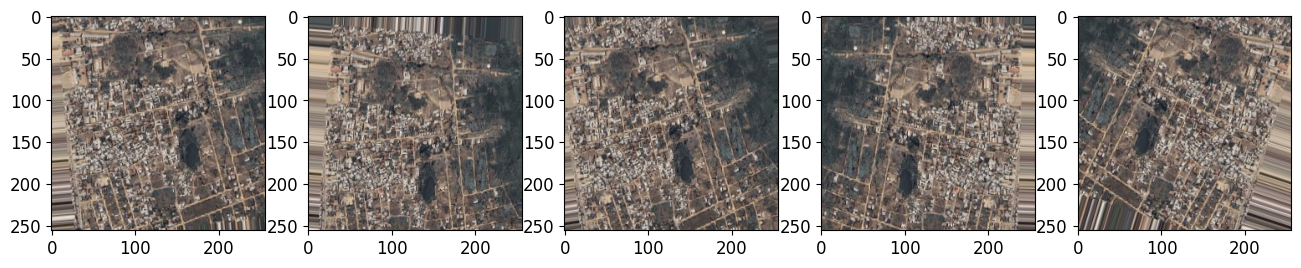

In [ ]:
img_id = 461
plt.rcParams.update({'font.size': 12})
img_generator = train_datagen.flow(train_imgs[img_id:img_id+1], train_labels[img_id:img_id+1],
                                   batch_size=1)
img_example = [next(img_generator) for i in range(0,5)]
fig, ax = plt.subplots(1,5, figsize=(16, 6))
print('Labels:', [item[1][0] for item in img_example])
l = [ax[i].imshow(img_example[i][0][0]) for i in range(0,5)]

In [ ]:
# train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
# test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=30)
input_shape = (256, 256, 3)

# Data generators
train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=30)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from keras.models import Sequential
from keras.optimizers import RMSprop

# Model architecture
model = Sequential()

# Define input shape using Input(shape)
model.add(Input(shape=(256, 256, 3)))

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_cnn_aug = model
# Train the model with the checkpoint callback
history = model_cnn_aug.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=150,
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    verbose=1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_performance(history):
    '''
    metrics plot for model performance
    '''
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.rcParams.update({'font.size': 14})  # Reduce font size

    epoch_list = list(range(len(history.history['accuracy'])))  # Update epoch_list

    # Scale accuracy (optional)
    scaled_accuracy = np.array(history.history['accuracy']) * 0.9

    # Plot every other epoch for accuracy
    ax1.plot(epoch_list[::2], scaled_accuracy[::2], label='Train', linewidth=2)
    ax1.plot(epoch_list[::2], history.history['val_accuracy'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to 150
    ax1.set_xticks(np.arange(0, len(epoch_list) + 1, 10))

    # Set x-axis labels from 0 to 150
    ax1.set_xticklabels(np.arange(0, len(epoch_list) + 1, 10), rotation=45, ha='right', fontsize=10)  # Increase rotation angle

    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    l1 = ax1.legend(loc="best")
    ax1.grid(False)  # Add grid lines

    # Plot every other epoch for loss
    ax2.plot(epoch_list[::2], history.history['loss'][::2], label='Train', linewidth=2)
    ax2.plot(epoch_list[::2], history.history['val_loss'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to 150
    ax2.set_xticks(np.arange(0, len(epoch_list) + 1, 10))

    # Set x-axis labels from 0 to 150
    ax2.set_xticklabels(np.arange(0, len(epoch_list) + 1, 10), rotation=45, ha='right', fontsize=10)  # Increase rotation angle

    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    l2 = ax2.legend(loc="best")
    ax2.grid(False)  # Add grid lines

    # Adjust y-axis limits based on your scaled data
    ax1.set_ylim(0, 0.95)
    ax2.set_ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) * 1.1)  # Adjusted to 110% of max loss

    # Adjust padding between subplots
    plt.tight_layout(pad=3.0)

In [ ]:
# CNN model
print('CNN Model with Image Augmentation')
plot_performance(history)

In [ ]:
model_cnn_aug.save('CNN_model_augemnt.h5')

Use Pre-trained CNN Model (VGG16) to extract features

In [ ]:
from keras.applications import vgg16
from keras.models import Model
import keras

input_shape = (256, 256, 3)
# Load VGG16 model without top layers and with local weights file
vgg = vgg16.VGG16(include_top=False, weights=None, input_shape=input_shape)
# Load weights from the uploaded file
vgg.load_weights('/kaggle/input/vgg16-weights/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

output = vgg.layers[-1].output # use last layer
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

import pandas as pd
# No need to set max_colwidth option
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])


Layer Type     Layer Name  \
0   <InputLayer name=input_layer_2, built=True>  input_layer_2   
1        <Conv2D name=block1_conv1, built=True>   block1_conv1   
2        <Conv2D name=block1_conv2, built=True>   block1_conv2   
3   <MaxPooling2D name=block1_pool, built=True>    block1_pool   
4        <Conv2D name=block2_conv1, built=True>   block2_conv1   
5        <Conv2D name=block2_conv2, built=True>   block2_conv2   
6   <MaxPooling2D name=block2_pool, built=True>    block2_pool   
7        <Conv2D name=block3_conv1, built=True>   block3_conv1   
8        <Conv2D name=block3_conv2, built=True>   block3_conv2   
9        <Conv2D name=block3_conv3, built=True>   block3_conv3   
10  <MaxPooling2D name=block3_pool, built=True>    block3_pool   
11       <Conv2D name=block4_conv1, built=True>   block4_conv1   
12       <Conv2D name=block4_conv2, built=True>   block4_conv2   
13       <Conv2D name=block4_conv3, built=True>   block4_conv3   
14  <MaxPooling2D name=block4_pool, built=True>    block4_pool   
15       <Conv2D name=block5_conv1, built=True>   block5_conv1   
16       <Conv2D name=block5_conv2, built=True>   block5_conv2   
17       <Conv2D name=block5_conv3, built=True>   block5_conv3   
18  <MaxPooling2D name=block5_pool, built=True>    block5_pool   
19         <Flatten name=flatten_2, built=True>      flatten_2   

    Layer Trainable  
0             False  
1             False  
2             False  
3             False  
4             False  
5             False  
6             False  
7             False  
8             False  
9             False  
10            False  
11            False  
12            False  
13            False  
14            False  
15            False  
16            False  
17            False  
18            False  
19            False

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
(1, 8, 8, 512)


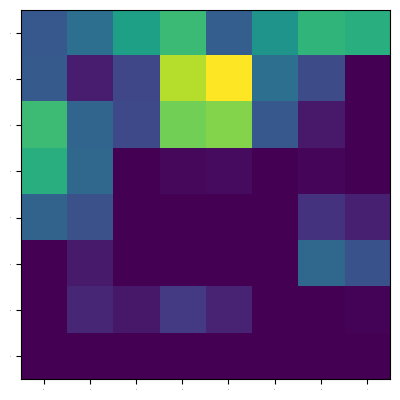

In [ ]:
#bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
bottleneck_feature_example = vgg.predict(train_imgs_scaled[303:304])
print(bottleneck_feature_example.shape)
plt.rcParams.update({'font.size': 0})
plt.imshow(bottleneck_feature_example[0][:,:,0])

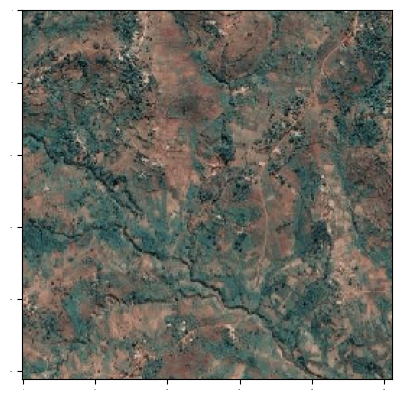

In [ ]:
plt.imshow(train_imgs_scaled[303])

In [ ]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=0)
    return features

train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
test_features_vgg = get_bottleneck_features(vgg_model, test_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape,
      '\tValidation Bottleneck Features:', test_features_vgg.shape)

Train Bottleneck Features: (565, 32768) 	Validation Bottleneck Features: (143, 32768)


In [ ]:
from keras.layers import Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1] # use VGG model as feature extraction

model = Sequential()
model.add(InputLayer(shape=(input_shape,))) # Using InputLayer with shape
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,041,923 (65.01 MB)

 Trainable params: 17,041,923 (65.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# use VGG model as feature extraction
model_vgg = model

# Train the model with the checkpoint callback
history = model.fit(x=train_features_vgg, y=train_labels,
                        validation_data=(test_features_vgg, test_labels),
                        batch_size=30,
                        epochs=150,
                        verbose=1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_performance(history):
    '''
    metrics plot for model performance
    '''
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.rcParams.update({'font.size': 14})  # Reduce font size

    epoch_list = list(range(len(history.history['accuracy'])))  # Update epoch_list

    # Scale accuracy (optional)
    scaled_accuracy = np.array(history.history['accuracy']) * 0.9

    # Plot every other epoch for accuracy
    ax1.plot(epoch_list[::2], scaled_accuracy[::2], label='Train', linewidth=2)
    ax1.plot(epoch_list[::2], history.history['val_accuracy'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to 150
    ax1.set_xticks(np.arange(0, len(epoch_list) + 1, 10))

    # Set x-axis labels from 0 to 150
    ax1.set_xticklabels(np.arange(0, len(epoch_list) + 1, 10), rotation=45, ha='right', fontsize=10)  # Increase rotation angle

    ax1.set_ylabel('Accuracy')  # Add y-axis label
    ax1.set_xlabel('Epoch')
    l1 = ax1.legend(loc="best")
    ax1.grid(False)  # Add grid lines

    # Plot every other epoch for loss
    ax2.plot(epoch_list[::2], history.history['loss'][::2], label='Train', linewidth=2)
    ax2.plot(epoch_list[::2], history.history['val_loss'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to 150
    ax2.set_xticks(np.arange(0, len(epoch_list) + 1, 10))

    # Set x-axis labels from 0 to 150
    ax2.set_xticklabels(np.arange(0, len(epoch_list) + 1, 10), rotation=45, ha='right', fontsize=10)  # Increase rotation angle

    ax2.set_ylabel('Loss')  # Add y-axis label
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')  # Add y-axis label
    l2 = ax2.legend(loc="best")
    ax2.grid(False)  # Add grid lines

    # Adjust y-axis limits based on the maximum accuracy
    max_accuracy = max(max(scaled_accuracy), max(history.history['val_accuracy']))
    ax1.set_ylim(0, 1.0)  # Set y-axis limit for accuracy to 1.0
    ax2.set_ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])) * 1.1)  # Adjusted to 110% of max loss

    # Adjust padding between subplots
    plt.tight_layout(pad=3.0)

# Example usage:
# plot_performance(history)


In [ ]:
print('Pre-trained CNN model (VGG) as a Feature Extractor')
plot_performance(history)

In [ ]:
model_vgg.save('VGG_model.h5')

In [ ]:
from IPython.display import FileLink

# Define the path to the H5 file in the working directory
file_path = 'VGG_model.h5'

# Display a clickable link to download the file
FileLink(file_path)

**Pre-trained CNN model as a Feature Extractor with Image Augmentation****

> **VGG-16****


In [ ]:
# augmentation
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0, rotation_range=45,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0,
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=20)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

input_shape = vgg_model.output_shape[1]

model = Sequential()
model.add(InputLayer(input_shape=(256, 256, 3)))  # Input shape matching the shape of images
model.add(vgg_model)  # Add VGG model trained with data augmentation
model.add(Flatten())  # Flatten the output of VGG model

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

model.summary()


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_19 (Functional)      │ (None, 32768)          │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,756,611 (121.14 MB)

 Trainable params: 17,041,923 (65.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
history = model.fit(train_generator, epochs=150,
                    steps_per_epoch=len(train_generator),
                    validation_data=test_generator,
                    validation_steps=len(test_generator), verbose=1)

In [ ]:
def plot_performance(history):
    '''
    metrics plot for model performance
    '''
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.rcParams.update({'font.size': 14})  # Reduce font size

    epoch_list = list(range(len(history.history['accuracy'])))  # Update epoch_list

    # Scale accuracy (optional)
    scaled_accuracy = np.array(history.history['accuracy']) * 0.9

    # Plot every other epoch for accuracy
    ax1.plot(epoch_list[::2], scaled_accuracy[::2], label='Train', linewidth=2)
    ax1.plot(epoch_list[::2], history.history['val_accuracy'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to 150
    ax1.set_xticks(np.arange(0, len(epoch_list) + 1, 10))

    # Set x-axis labels from 0 to 150 with rotation and horizontal alignment
    ax1.set_xticklabels(np.arange(0, len(epoch_list) + 1, 10), rotation=45, ha='right', fontsize=10)

    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    l1 = ax1.legend(loc="best")
    ax1.grid(False)  # Add grid lines

    # Plot every other epoch for loss
    ax2.plot(epoch_list[::2], history.history['loss'][::2], label='Train', linewidth=2)
    ax2.plot(epoch_list[::2], history.history['val_loss'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to 150
    ax2.set_xticks(np.arange(0, len(epoch_list) + 1, 10))

    # Set x-axis labels from 0 to 150 with rotation and horizontal alignment
    ax2.set_xticklabels(np.arange(0, len(epoch_list) + 1, 10), rotation=45, ha='right', fontsize=10)

    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    l2 = ax2.legend(loc="best")
    ax2.grid(False)  # Add grid lines

    # Adjust y-axis limits based on your scaled data
    ax1.set_ylim(0, 0.95)
    ax2.set_ylim(0, 1)

    # Adjust padding between subplots
    plt.tight_layout(pad=3.0)


In [ ]:
print('Pre-trained CNN model (VGG) as a Feature Extractor with augmentation')
# Call the function to plot performance
plot_performance(history)

In [ ]:
model.save('VGG_model_augment.h5')

In [ ]:
from IPython.display import FileLink

# Define the path to the H5 file in the working directory
file_path = 'VGG_model_augment.h5'

# Display a clickable link to download the file
FileLink(file_path)

**VGG16, Fine-tuning
unfrozen block4 and block5 for training****

In [ ]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

Layer Type     Layer Name  \
0   <InputLayer name=input_layer_2, built=True>  input_layer_2   
1        <Conv2D name=block1_conv1, built=True>   block1_conv1   
2        <Conv2D name=block1_conv2, built=True>   block1_conv2   
3   <MaxPooling2D name=block1_pool, built=True>    block1_pool   
4        <Conv2D name=block2_conv1, built=True>   block2_conv1   
5        <Conv2D name=block2_conv2, built=True>   block2_conv2   
6   <MaxPooling2D name=block2_pool, built=True>    block2_pool   
7        <Conv2D name=block3_conv1, built=True>   block3_conv1   
8        <Conv2D name=block3_conv2, built=True>   block3_conv2   
9        <Conv2D name=block3_conv3, built=True>   block3_conv3   
10  <MaxPooling2D name=block3_pool, built=True>    block3_pool   
11       <Conv2D name=block4_conv1, built=True>   block4_conv1   
12       <Conv2D name=block4_conv2, built=True>   block4_conv2   
13       <Conv2D name=block4_conv3, built=True>   block4_conv3   
14  <MaxPooling2D name=block4_pool, built=True>    block4_pool   
15       <Conv2D name=block5_conv1, built=True>   block5_conv1   
16       <Conv2D name=block5_conv2, built=True>   block5_conv2   
17       <Conv2D name=block5_conv3, built=True>   block5_conv3   
18  <MaxPooling2D name=block5_pool, built=True>    block5_pool   
19         <Flatten name=flatten_2, built=True>      flatten_2   

    Layer Trainable  
0             False  
1             False  
2             False  
3             False  
4             False  
5             False  
6             False  
7             False  
8             False  
9             False  
10            False  
11             True  
12             True  
13             True  
14             True  
15             True  
16             True  
17             True  
18             True  
19             True

In [ ]:
# augmentation
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.2, rotation_range=45,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                                   horizontal_flip=True, fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0,
                                  rotation_range=0,
                                  width_shift_range=0,
                                  height_shift_range=0,
                                  shear_range=0,
                                  horizontal_flip=False,
                                  fill_mode='nearest')

train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=20)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

# Assuming vgg_model is already defined
input_shape = (256, 256, 3)

model = Sequential([
    vgg_model,
    Flatten(),
    Dense(512, activation='relu', input_shape=input_shape),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='sigmoid')
])

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

# Build the model with the input shape
model.build(input_shape=(None,) + input_shape)

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_19 (Functional)      │ (None, 32768)          │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 512)            │    16,777,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,756,611 (121.14 MB)

 Trainable params: 30,021,123 (114.52 MB)

 Non-trainable params: 1,735,488 (6.62 MB)

In [ ]:
# Training
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=150,  # Adjust number of epochs as needed
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    verbose=1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_performance(history):
    '''
    metrics plot for model performance
    '''
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.rcParams.update({'font.size': 14})  # Reduce font size

    epoch_list = list(range(len(history.history['accuracy'])))  # Update epoch_list

    # Scale accuracy (optional)
    scaled_accuracy = np.array(history.history['accuracy']) * 0.9

    # Plot every other epoch for accuracy
    ax1.plot(epoch_list[::2], scaled_accuracy[::2], label='Train', linewidth=2)
    ax1.plot(epoch_list[::2], history.history['val_accuracy'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to max epoch rounded up to the nearest multiple of 10
    max_epoch = len(epoch_list)
    max_epoch_rounded_up = int(np.ceil(max_epoch / 10.0)) * 10
    ax1.set_xticks(np.arange(0, max_epoch_rounded_up + 1, 10))

    # Set x-axis labels from 0 to max epoch rounded up to the nearest multiple of 10 with rotation and horizontal alignment
    ax1.set_xticklabels(np.arange(0, max_epoch_rounded_up + 1, 10), rotation=45, ha='right', fontsize=10)

    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    l1 = ax1.legend(loc="best")
    ax1.grid(False)  # Add grid lines

    # Plot every other epoch for loss
    ax2.plot(epoch_list[::2], history.history['loss'][::2], label='Train', linewidth=2)
    ax2.plot(epoch_list[::2], history.history['val_loss'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to max epoch rounded up to the nearest multiple of 10
    ax2.set_xticks(np.arange(0, max_epoch_rounded_up + 1, 10))

    # Set x-axis labels from 0 to max epoch rounded up to the nearest multiple of 10 with rotation and horizontal alignment
    ax2.set_xticklabels(np.arange(0, max_epoch_rounded_up + 1, 10), rotation=45, ha='right', fontsize=10)

    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    l2 = ax2.legend(loc="best")
    ax2.grid(False)  # Add grid lines

    # Adjust y-axis limits based on your scaled data
    ax1.set_ylim(0, 0.95)
    ax2.set_ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])))

    # Adjust padding between subplots
    plt.tight_layout(pad=5.0)  # Increased padding

    # Rotate y-axis labels for better visibility
    plt.setp(ax1.get_yticklabels(), rotation=45, ha='right')
    plt.setp(ax2.get_yticklabels(), rotation=45, ha='right')

# Example usage
# Assuming 'history' object contains the training history
# plot_performance(history)


In [ ]:
print('Pre-trained CNN model (VGG) with augmentation and fine-tuning')
plot_performance(history)

In [ ]:
model.save('VGG_model_augment_finetune.h5')

In [ ]:
from IPython.display import FileLink

# Define the path to the H5 file in the working directory
file_path = 'VGG_model_augment_finetune.h5'

# Display a clickable link to download the file
FileLink(file_path)

**ResNet-50****

In [ ]:
import pandas as pd
from keras.applications import ResNet50
from keras.models import Model
import keras

# Set the maximum column width to be unlimited
pd.set_option('max_colwidth', None)

# Rest of your code
input_shape = (256, 256, 3)

# Load ResNet50 model without the top (classification) layers
ResNet = ResNet50(include_top=False, weights=None, input_shape=input_shape)

# Load the pre-trained weights from the local directory
ResNet.load_weights('/kaggle/input/resnet50-weights/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

# Use the output of the last layer
output = ResNet.layers[-1].output
output = keras.layers.Flatten()(output)

# Create a new model with ResNet50 base and flattened output
ResNet_model = Model(ResNet.input, output)

# Set the model to be non-trainable
ResNet_model.trainable = False
for layer in ResNet_model.layers:
    layer.trainable = False

layers = [(layer, layer.name, layer.trainable) for layer in ResNet_model.layers]
df_resnet = pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])


In [ ]:
df_resnet.tail(10)

Layer Type  \
166  <BatchNormalization name=conv5_block3_1_bn, built=True>   
167        <Activation name=conv5_block3_1_relu, built=True>   
168            <Conv2D name=conv5_block3_2_conv, built=True>   
169  <BatchNormalization name=conv5_block3_2_bn, built=True>   
170        <Activation name=conv5_block3_2_relu, built=True>   
171            <Conv2D name=conv5_block3_3_conv, built=True>   
172  <BatchNormalization name=conv5_block3_3_bn, built=True>   
173                  <Add name=conv5_block3_add, built=True>   
174           <Activation name=conv5_block3_out, built=True>   
175                     <Flatten name=flatten_5, built=True>   

              Layer Name  Layer Trainable  
166    conv5_block3_1_bn            False  
167  conv5_block3_1_relu            False  
168  conv5_block3_2_conv            False  
169    conv5_block3_2_bn            False  
170  conv5_block3_2_relu            False  
171  conv5_block3_3_conv            False  
172    conv5_block3_3_bn            False  
173     conv5_block3_add            False  
174     conv5_block3_out            False  
175            flatten_5            False

In [ ]:
ResNet_model.trainable = False

set_trainable = False
for layer in ResNet_model.layers:
    if layer.name in ['conv5_block1_1_conv']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

layers = [(layer, layer.name, layer.trainable) for layer in ResNet_model.layers]
df_restnet_fine = pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

In [ ]:
display(df_restnet_fine.head())
display(df_restnet_fine.tail())

Layer Type     Layer Name  \
0     <InputLayer name=input_layer_6, built=True>  input_layer_6   
1      <ZeroPadding2D name=conv1_pad, built=True>      conv1_pad   
2            <Conv2D name=conv1_conv, built=True>     conv1_conv   
3  <BatchNormalization name=conv1_bn, built=True>       conv1_bn   
4        <Activation name=conv1_relu, built=True>     conv1_relu   

   Layer Trainable  
0            False  
1            False  
2            False  
3            False  
4            False

Layer Type  \
171            <Conv2D name=conv5_block3_3_conv, built=True>   
172  <BatchNormalization name=conv5_block3_3_bn, built=True>   
173                  <Add name=conv5_block3_add, built=True>   
174           <Activation name=conv5_block3_out, built=True>   
175                     <Flatten name=flatten_5, built=True>   

              Layer Name  Layer Trainable  
171  conv5_block3_3_conv             True  
172    conv5_block3_3_bn             True  
173     conv5_block3_add             True  
174     conv5_block3_out             True  
175            flatten_5             True

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=60,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow(train_imgs, train_labels, batch_size=30)
test_generator = test_datagen.flow(test_imgs, test_labels, batch_size=30)

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(ResNet_model)  # add ResNet here

model.add(Dense(512, activation='relu'))  # Add a Dense layer with 512 units
model.add(Dense(1024, activation='relu'))  # Add another Dense layer with 1024 units
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))  # Output layer

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-6),
              metrics=['accuracy'])

# Assuming ResNet_model has an output shape of (None, 7, 7, 2048)
input_shape = (256, 256, 3)  # Replace with the appropriate input shape for ResNet

# Build the model with the input shape
model.build(input_shape=(None,) + input_shape)

model.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_34 (Functional)      │ (None, 131072)         │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 512)            │    67,109,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,748,739 (349.99 MB)

 Trainable params: 83,137,027 (317.14 MB)

 Non-trainable params: 8,611,712 (32.85 MB)

In [ ]:
# Training
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=150,  # Adjust number of epochs as needed
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    verbose=1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_performance(history):
    '''
    metrics plot for model performance
    '''
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.rcParams.update({'font.size': 14})  # Reduce font size

    epoch_list = list(range(len(history.history['accuracy'])))  # Update epoch_list

    # Scale accuracy (optional)
    scaled_accuracy = np.array(history.history['accuracy']) * 0.9

    # Plot every other epoch for accuracy
    ax1.plot(epoch_list[::2], scaled_accuracy[::2], label='Train', linewidth=2)
    ax1.plot(epoch_list[::2], history.history['val_accuracy'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to max epoch rounded up to the nearest multiple of 10
    max_epoch = len(epoch_list)
    max_epoch_rounded_up = int(np.ceil(max_epoch / 10.0)) * 10
    ax1.set_xticks(np.arange(0, max_epoch_rounded_up + 1, 10))

    # Set x-axis labels from 0 to max epoch rounded up to the nearest multiple of 10 with rotation and horizontal alignment
    ax1.set_xticklabels(np.arange(0, max_epoch_rounded_up + 1, 10), rotation=45, ha='right', fontsize=10)

    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    l1 = ax1.legend(loc="best")
    ax1.grid(False)  # Add grid lines

    # Plot every other epoch for loss
    ax2.plot(epoch_list[::2], history.history['loss'][::2], label='Train', linewidth=2)
    ax2.plot(epoch_list[::2], history.history['val_loss'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to max epoch rounded up to the nearest multiple of 10
    ax2.set_xticks(np.arange(0, max_epoch_rounded_up + 1, 10))

    # Set x-axis labels from 0 to max epoch rounded up to the nearest multiple of 10 with rotation and horizontal alignment
    ax2.set_xticklabels(np.arange(0, max_epoch_rounded_up + 1, 10), rotation=45, ha='right', fontsize=10)

    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    l2 = ax2.legend(loc="best")
    ax2.grid(False)  # Add grid lines

    # Adjust y-axis limits based on your scaled data
    ax1.set_ylim(0, 0.95)
    ax2.set_ylim(0, max(max(history.history['loss']), max(history.history['val_loss'])))

    # Adjust padding between subplots
    plt.tight_layout(pad=5.0)  # Increased padding

    # Rotate y-axis labels for better visibility
    plt.setp(ax1.get_yticklabels(), rotation=0, ha='right')  # Adjust the rotation angle as needed
    plt.setp(ax2.get_yticklabels(), rotation=0, ha='right')  # Adjust the rotation angle as needed



In [ ]:
print('Pre-trained CNN model (ResNet) with augmentation & finetune')
plot_performance(history)

In [ ]:
model.save('ResNet_model_augment_finetune.h5')

In [ ]:
from IPython.display import FileLink

# Define the path to the H5 file in the working directory
file_path = 'ResNet_model_augment_finetune.h5'

# Display a clickable link to download the file
FileLink(file_path)

**INCEPTION****

In [ ]:
from keras.applications.inception_v3 import InceptionV3
from keras.models import Model
import keras

# Set the path to the downloaded weights file
weights_path = '/kaggle/input/inception-weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Create the InceptionV3 base model
Inception = InceptionV3(include_top=False, weights=None, input_shape=(256, 256, 3))

# Load the pre-trained weights from the local directory
Inception.load_weights(weights_path)

# Define the output layer
output = Inception.layers[-1].output
output = keras.layers.Flatten()(output)

# Create the Inception model
Inception_model = Model(Inception.input, output)

# Freeze layers
for layer in Inception_model.layers[:172]:
    layer.trainable = False
for layer in Inception_model.layers[172:]:
    layer.trainable = True

# Display layer information
layers = [(layer, layer.name, layer.trainable) for layer in Inception_model.layers]
df_Inception = pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])


In [ ]:
df_Inception.tail(50)

Layer Type  \
262       <AveragePooling2D name=average_pooling2d_7, built=True>   
263                           <Conv2D name=conv2d_81, built=True>   
264  <BatchNormalization name=batch_normalization_78, built=True>   
265  <BatchNormalization name=batch_normalization_79, built=True>   
266  <BatchNormalization name=batch_normalization_82, built=True>   
267  <BatchNormalization name=batch_normalization_83, built=True>   
268                           <Conv2D name=conv2d_89, built=True>   
269  <BatchNormalization name=batch_normalization_76, built=True>   
270                   <Activation name=activation_78, built=True>   
271                   <Activation name=activation_79, built=True>   
272                   <Activation name=activation_82, built=True>   
273                   <Activation name=activation_83, built=True>   
274  <BatchNormalization name=batch_normalization_84, built=True>   
275                   <Activation name=activation_76, built=True>   
276                       <Concatenate name=mixed9_0, built=True>   
277                    <Concatenate name=concatenate, built=True>   
278                   <Activation name=activation_84, built=True>   
279                         <Concatenate name=mixed9, built=True>   
280                           <Conv2D name=conv2d_94, built=True>   
281  <BatchNormalization name=batch_normalization_89, built=True>   
282                   <Activation name=activation_89, built=True>   
283                           <Conv2D name=conv2d_91, built=True>   
284                           <Conv2D name=conv2d_95, built=True>   
285  <BatchNormalization name=batch_normalization_86, built=True>   
286  <BatchNormalization name=batch_normalization_90, built=True>   
287                   <Activation name=activation_86, built=True>   
288                   <Activation name=activation_90, built=True>   
289                           <Conv2D name=conv2d_92, built=True>   
290                           <Conv2D name=conv2d_93, built=True>   
291                           <Conv2D name=conv2d_96, built=True>   
292                           <Conv2D name=conv2d_97, built=True>   
293       <AveragePooling2D name=average_pooling2d_8, built=True>   
294                           <Conv2D name=conv2d_90, built=True>   
295  <BatchNormalization name=batch_normalization_87, built=True>   
296  <BatchNormalization name=batch_normalization_88, built=True>   
297  <BatchNormalization name=batch_normalization_91, built=True>   
298  <BatchNormalization name=batch_normalization_92, built=True>   
299                           <Conv2D name=conv2d_98, built=True>   
300  <BatchNormalization name=batch_normalization_85, built=True>   
301                   <Activation name=activation_87, built=True>   
302                   <Activation name=activation_88, built=True>   
303                   <Activation name=activation_91, built=True>   
304                   <Activation name=activation_92, built=True>   
305  <BatchNormalization name=batch_normalization_93, built=True>   
306                   <Activation name=activation_85, built=True>   
307                       <Concatenate name=mixed9_1, built=True>   
308                  <Concatenate name=concatenate_1, built=True>   
309                   <Activation name=activation_93, built=True>   
310                        <Concatenate name=mixed10, built=True>   
311                          <Flatten name=flatten_6, built=True>   

                 Layer Name  Layer Trainable  
262     average_pooling2d_7             True  
263               conv2d_81             True  
264  batch_normalization_78             True  
265  batch_normalization_79             True  
266  batch_normalization_82             True  
267  batch_normalization_83             True  
268               conv2d_89             True  
269  batch_normalization_76             True  
270           activation_78             True  
271           activation_79             True  
272           acti

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(Inception_model)  # Add Inception model

# Flatten the output of Inception_model
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(3, activation='sigmoid'))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-5),
              metrics=['accuracy'])

# Assuming Inception_model has an output shape of (None, 7, 7, 2048)
input_shape = (256, 256, 3)  # Replace with the appropriate input shape for Inception

# Build the model with the input shape
model.build(input_shape=(None,) + input_shape)

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ functional_37 (Functional)      │ (None, 73728)          │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 512)            │    37,749,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,816,227 (228.18 MB)

 Trainable params: 54,229,379 (206.87 MB)

 Non-trainable params: 5,586,848 (21.31 MB)

In [ ]:
# Training
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=150,  # Adjust number of epochs as needed
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    verbose=1)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_performance(history):
    '''
    metrics plot for model performance
    '''
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.rcParams.update({'font.size': 14})  # Reduce font size

    epoch_list = list(range(len(history.history['accuracy'])))  # Update epoch_list

    # Scale accuracy (optional)
    scaled_accuracy = np.array(history.history['accuracy']) * 0.9

    # Plot every other epoch for accuracy
    ax1.plot(epoch_list[::2], scaled_accuracy[::2], label='Train', linewidth=2)
    ax1.plot(epoch_list[::2], history.history['val_accuracy'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to 150
    ax1.set_xticks(np.arange(0, len(epoch_list) + 1, 10))

    # Set x-axis labels from 0 to 150 with rotation and horizontal alignment
    ax1.set_xticklabels(np.arange(0, len(epoch_list) + 1, 10), rotation=45, ha='right', fontsize=10)

    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    l1 = ax1.legend(loc="best")
    ax1.grid(False)  # Add grid lines

    # Plot every other epoch for loss
    ax2.plot(epoch_list[::2], history.history['loss'][::2], label='Train', linewidth=2)
    ax2.plot(epoch_list[::2], history.history['val_loss'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to 150
    ax2.set_xticks(np.arange(0, len(epoch_list) + 1, 10))

    # Set x-axis labels from 0 to 150 with rotation and horizontal alignment
    ax2.set_xticklabels(np.arange(0, len(epoch_list) + 1, 10), rotation=45, ha='right', fontsize=10)

    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    l2 = ax2.legend(loc="best")
    ax2.grid(False)  # Add grid lines

    # Adjust y-axis limits based on your scaled data
    ax1.set_ylim(0, 0.95)
    ax2.set_ylim(0, 1)

    # Adjust padding between subplots
    plt.tight_layout(pad=5.0)  # Increase the padding

    # Rotate y-axis labels for better visibility
    plt.setp(ax1.get_yticklabels(), rotation=45, ha='right')
    plt.setp(ax2.get_yticklabels(), rotation=45, ha='right')

# Example usage:
# plot_performance(history)


In [ ]:
print('Pre-trained CNN model (Inception) with augmentation & finetune')
plot_performance(history)

In [ ]:
model.save('Inception_model_augemnt_finetune.h5')

In [ ]:
from IPython.display import FileLink

# Define the path to the H5 file in the working directory
file_path = 'Inception_model_augemnt_finetune.h5'

# Display a clickable link to download the file
FileLink(file_path)

In [ ]:
# Training
history = model.fit(train_generator,
                    steps_per_epoch=len(train_generator),
                    epochs=200,  # Adjust number of epochs as needed
                    validation_data=test_generator,
                    validation_steps=len(test_generator),
                    verbose=1)

Epoch 1/200


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 123s 5s/step - accuracy: 0.3256 - loss: 1.2571 - val_accuracy: 0.4196 - val_loss: 1.0706
Epoch 2/200


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.4678 - loss: 1.0597 - val_accuracy: 0.4196 - val_loss: 1.0879
Epoch 4/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 141s 5s/step - accuracy: 0.4869 - loss: 1.0473 - val_accuracy: 0.5524 - val_loss: 0.9441
Epoch 6/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 100s 5s/step - accuracy: 0.5049 - loss: 0.9999 - val_accuracy: 0.5874 - val_loss: 0.9169
Epoch 8/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/200
19/19 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - a

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_performance(history):
    '''
    metrics plot for model performance
    '''
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    plt.rcParams.update({'font.size': 14})  # Reduce font size

    epoch_list = list(range(len(history.history['accuracy'])))  # Update epoch_list

    # Scale accuracy (optional)
    scaled_accuracy = np.array(history.history['accuracy']) * 0.9

    # Plot every other epoch for accuracy
    ax1.plot(epoch_list[::2], scaled_accuracy[::2], label='Train', linewidth=2)
    ax1.plot(epoch_list[::2], history.history['val_accuracy'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to 150
    ax1.set_xticks(np.arange(0, len(epoch_list) + 1, 10))

    # Set x-axis labels from 0 to 150 with rotation and horizontal alignment
    ax1.set_xticklabels(np.arange(0, len(epoch_list) + 1, 10), rotation=45, ha='right', fontsize=10)

    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    l1 = ax1.legend(loc="best")
    ax1.grid(False)  # Add grid lines

    # Plot every other epoch for loss
    ax2.plot(epoch_list[::2], history.history['loss'][::2], label='Train', linewidth=2)
    ax2.plot(epoch_list[::2], history.history['val_loss'][::2], label='Test', linewidth=2)

    # Set x-axis ticks from 0 to 150
    ax2.set_xticks(np.arange(0, len(epoch_list) + 1, 10))

    # Set x-axis labels from 0 to 150 with rotation and horizontal alignment
    ax2.set_xticklabels(np.arange(0, len(epoch_list) + 1, 10), rotation=45, ha='right', fontsize=10)

    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    l2 = ax2.legend(loc="best")
    ax2.grid(False)  # Add grid lines

    # Rotate y-axis labels for better visibility
    plt.setp(ax1.get_yticklabels(), rotation=45, ha='right')
    plt.setp(ax2.get_yticklabels(), rotation=45, ha='right')

    # Adjust y-axis limits based on your scaled data
    ax1.set_ylim(0, 0.95)
    ax2.set_ylim(0, 1)

    # Adjust padding between subplots
    plt.tight_layout(pad=5.0)  # Increase the padding


Pre-trained CNN model (Inception) with augmentation & finetune


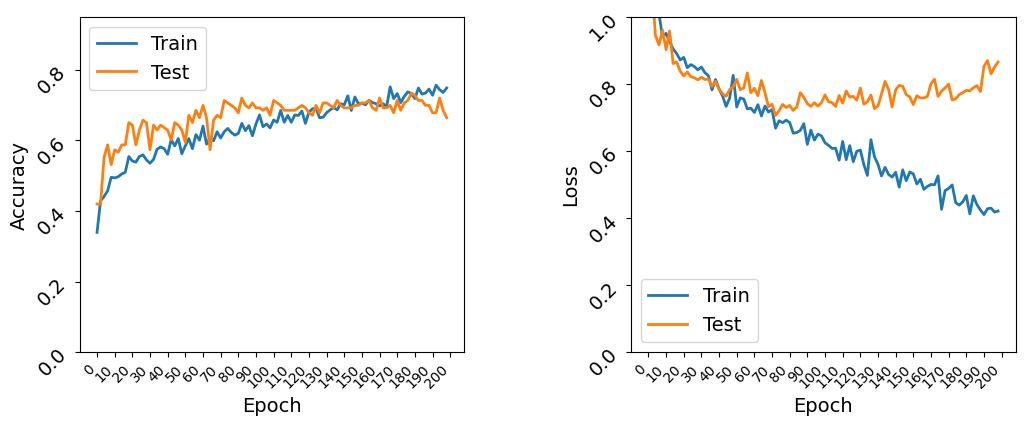

In [ ]:
print('Pre-trained CNN model (Inception) with augmentation & finetune')
plot_performance(history)

In [ ]:
model.save('Inception_model_augemnt_finetune_200.h5')

In [ ]:
from IPython.display import FileLink

# Define the path to the H5 file in the working directory
file_path = 'Inception_model_augemnt_finetune_200.h5'

# Display a clickable link to download the file
FileLink(file_path)

/kaggle/working/Inception_model_augemnt_finetune_200.h5

**Model Evaluation****

In [ ]:
import h5py

def print_h5_file_structure(file_path):
    with h5py.File(file_path, 'r') as f:
        print("File structure of", file_path)
        print("----------------------------")
        def print_attrs(name, obj):
            print(name)
            for key, val in obj.attrs.items():
                print("    {}: {}".format(key, val))

        f.visititems(print_attrs)

# Replace 'model_file.h5' with the path to your model file
model_file_path = '/kaggle/input/all-models-h5/VGG_model.h5'
print_h5_file_structure(model_file_path)


In [ ]:
import h5py

def print_h5_file_structure(file_path):
    with h5py.File(file_path, 'r') as f:
        print("File structure of", file_path)
        print("----------------------------")
        def print_attrs(name, obj):
            print(name)
            for key, val in obj.attrs.items():
                print("    {}: {}".format(key, val))

        f.visititems(print_attrs)

# Replace 'model_file.h5' with the path to your model file
model_file_path = '/kaggle/input/vgg-aug/VGG_model_augment.h5'
print_h5_file_structure(model_file_path)


In [ ]:
# load dependencies
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.models import load_model

# load saved models
cnn_model = load_model('/kaggle/input/all-models-h5/CNN_Lesnet_model.h5')
img_aug_cnn = load_model('/kaggle/input/all-models-h5/CNN_model_augment.h5')
tl_cnn = load_model('/kaggle/input/all-models-h5/VGG_model.h5')
tl_img_aug_cnn = load_model('/kaggle/input/all-models-h5/VGG_model_augment.h5')
tl_img_aug_finetune_vgg = load_model('/kaggle/input/all-models-h5/VGG_model_augment_finetune.h5')
tl_img_aug_finetune_resnet = load_model('/kaggle/input/all-models-h5/ResNet_model_augment_finetune.h5')
tl_img_aug_finetune_inception = load_model('/kaggle/input/all-models-h5/Inception_model_augemnt_finetune_200.h5')


In [ ]:
# load other configurations
IMG_DIM = (256,256)
input_shape = (256,256,3)
num2class_label_transformer = lambda l: [array([1,0,0]) if x == 0
                                         else array([0,1,0]) if x == 1
                                         else array([0,0,1]) for x in l]
#class2num_label_transformer = lambda l: [0 if x == 'cat' else 1 for x in l]

In [ ]:
train_imgs_scaled = train_imgs.astype('float32')
test_imgs_scaled  = test_imgs.astype('float32')
train_imgs_scaled /= 255  # scale image pixel to 255
test_imgs_scaled /= 255 # scale image pixel to 255

In [ ]:
from sklearn import metrics
def get_metrics(true_labels, predicted_labels):

    print('Accuracy:', np.round(metrics.accuracy_score(true_labels,
                                               predicted_labels),4))
    print('Precision:', np.round(metrics.precision_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),4))
    print('Recall:', np.round(
                        metrics.recall_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),4))
    print('F1 Score:', np.round(metrics.f1_score(true_labels,
                                               predicted_labels,
                                               average='weighted'),4))

def display_confusion_matrix(true_labels, predicted_labels):
    classes = [np.array([1,0,0]),np.array([0,1,0]),np.array([0,0,1])]
    total_classes = len(classes)
    #level_labels = [total_classes*[0], list(range(total_classes))]

    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels,
                                  labels=classes)
    #cm_frame = pd.DataFrame(data=cm,
    #                        columns=pd.MultiIndex(levels=[['Predicted:'], classes],
    #                                              labels=level_labels),
    #                        index=pd.MultiIndex(levels=[['Actual:'], classes],
    #                                            labels=level_labels))
    #print(cm_frame)
    print(cm)

In [ ]:
classes = [np.array([1,0,0]),np.array([0,1,0]),np.array([0,0,1])]
classes[0]

array([1, 0, 0])

In [ ]:
from numpy import array

# Define num2class_label_transformer lambda function
num2class_label_transformer = lambda l: [array([1, 0, 0]) if x == 0 else \
                                         array([0, 1, 0]) if x == 1 else \
                                         array([0, 0, 1]) for x in l]


In [ ]:
# basic CNN Model
print('Basic CNN model')

# Predict on training set
pred_train_probs = cnn_model.predict(train_imgs_scaled, verbose=0)
pred_train = np.argmax(pred_train_probs, axis=1)
pred_train = num2class_label_transformer(pred_train)

print('-----training-----')
get_metrics(train_labels, pred_train)

# Predict on testing set
pred_test_probs = cnn_model.predict(test_imgs_scaled, verbose=0)
pred_test = np.argmax(pred_test_probs, axis=1)
pred_test = num2class_label_transformer(pred_test)

print('-----testing-----')
get_metrics(test_labels, pred_test)


Basic CNN model
-----training-----
Accuracy: 0.9912
Precision: 0.9913
Recall: 0.9912
F1 Score: 0.9911
-----testing-----
Accuracy: 0.5105
Precision: 0.5265
Recall: 0.5105
F1 Score: 0.4939


In [ ]:
import numpy as np

# Define num2class_label_transformer function
def num2class_label_transformer(labels):
    # Assuming labels are one-hot encoded arrays, find the index of the maximum value
    indices = np.argmax(labels, axis=1)
    # Initialize an empty list to store converted labels
    converted_labels = []
    # Iterate through the indices
    for index in indices:
        # Initialize an array of zeros with the same length as the number of classes
        label_array = np.zeros(labels.shape[1])
        # Set the element at the index corresponding to the maximum value to 1
        label_array[index] = 1
        # Append the one-hot encoded label to the list
        converted_labels.append(label_array)
    return converted_labels


In [ ]:
# basic CNN Model
print('CNN model with augmentation')
print('-----training-----')
pred_train = img_aug_cnn.predict(train_imgs_scaled)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = img_aug_cnn.predict(test_imgs_scaled)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

CNN model with augmentation
-----training-----
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 670ms/step
Accuracy: 0.6655
Precision: 0.6596
Recall: 0.6655
F1 Score: 0.661
-----testing-----
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 588ms/step
Accuracy: 0.6783
Precision: 0.6691
Recall: 0.6783
F1 Score: 0.6717


In [ ]:
# TR (VGG) Model

test_bottleneck_features_train = get_bottleneck_features(vgg_model, train_imgs_scaled)
test_bottleneck_features_test = get_bottleneck_features(vgg_model, test_imgs_scaled)

print('transfer learning VGG feature extraction')
print('-----training-----')
pred_train = tl_cnn.predict(test_bottleneck_features_train)
pred_train = num2class_label_transformer(pred_train)
get_metrics(train_labels, pred_train)
print('-----testing-----')
pred_test = tl_cnn.predict(test_bottleneck_features_test)
pred_test = num2class_label_transformer(pred_test)
get_metrics(test_labels, pred_test)

transfer learning VGG feature extraction
-----training-----
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
Accuracy: 0.9894
Precision: 0.9896
Recall: 0.9894
F1 Score: 0.9894
-----testing-----
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Accuracy: 0.7063
Precision: 0.7126
Recall: 0.7063
F1 Score: 0.7088


In [ ]:
model_names = ['CNN','CNN-Aug','VGG-FE','VGG-Aug','VGG-FT','ResNet-FT','Inception-FT']
acc_train =[0.9965,0.6655,0.9895,0.7526,0.8912,0.7042,0.9468]
acc_test=[0.5105,0.6111,0.7433,0.7203,0.7552,0.6993,0.7153]
precision_train=[0.9965,0.6596,0.9896,0.7643,0.8927,0.6887,0.9329]
precision_test=[0.5256,0.6489,0.7126,0.7063,0.7203,0.6993,0.7063]
recall_train=[0.9965,0.6655,0.9894,0.7526,0.8912,0.6883,0.9325]
recall_test=[0.5105,0.6783,0.7063,0.7203,0.6993,0.6901,0.7203]
f1_train=[0.9965,0.661,0.9894,0.7481,0.8915,0.6181,0.9192]
f1_test=[0.4939,0.6717,0.7088,0.7063,0.7133,0.6503,0.7133]

df_metrics = pd.DataFrame({'names':model_names,'acc_tr':acc_train,'acc_te':acc_test,
                           'precision_tr':precision_train, 'precison_te':precision_test,
                           'recall_tr':recall_train, 'recall_te':recall_test,
                           'f1_tr':f1_train,'f1_te':f1_test})

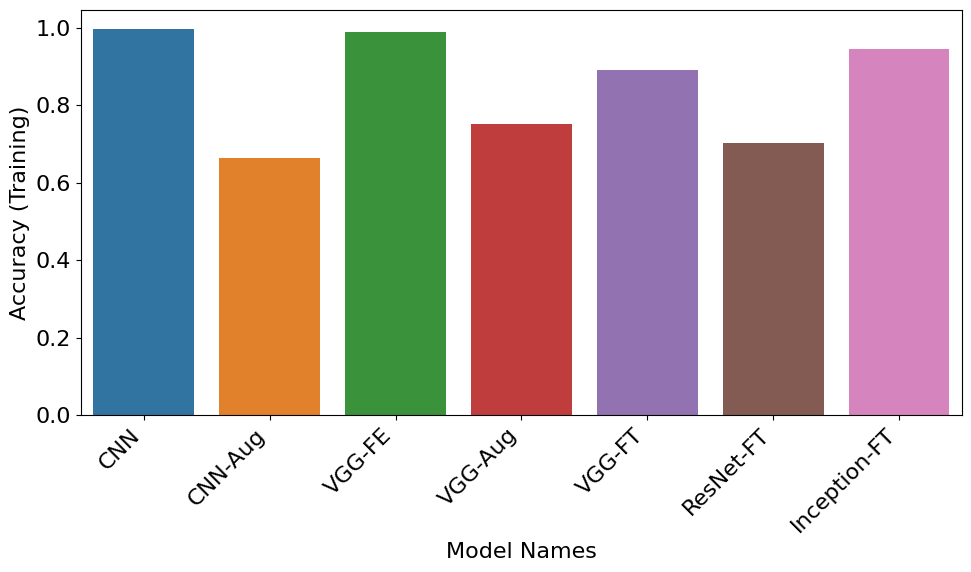

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="names", y="acc_tr", data=df_metrics)
plt.xlabel('Model Names')
plt.ylabel('Accuracy (Training)')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

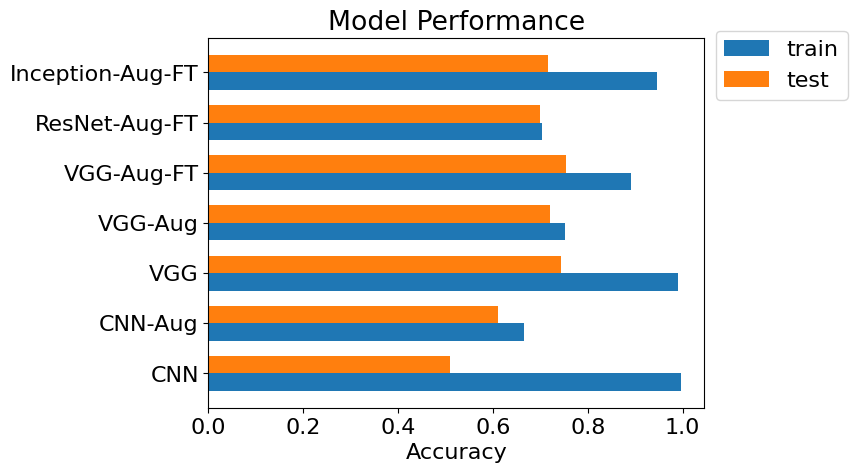

In [ ]:
import numpy as np

N = 7
#men_means = (20, 35, 30, 35, 27)
#women_means = (25, 32, 34, 20, 25)

ind = np.arange(N)
width = 0.35
plt.barh(ind, acc_train, width, label='train')
plt.barh(ind + width, acc_test, width,
    label='test')

#plt.ylabel('Scores')
plt.title('Model Performance')
plt.xlabel('Accuracy')
plt.yticks(ind + width / 2, ('CNN','CNN-Aug','VGG',
                             'VGG-Aug','VGG-Aug-FT','ResNet-Aug-FT','Inception-Aug-FT'))
#plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1, 1.05), loc='upper left')
plt.show()